Vinculamos la cuenta de Drive para que se nos permita realizar el proyecto así como descargamos la librería nueva que implementaremos más adelante

In [42]:
from google.colab import drive
drive.mount('/content/drive')
!pip install mlinsights


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.** Importamos la base de datos de las calificaciones de sistemas digitales donde tenemos dos variables una de tiempo en horas y otra de calificación, se estará haciendo a su vez una gráfica de dispersión para visualizar la distribución de los datos, pero para esto se identificó en la base de datos valores atipicos los cuales fueron eliminados directamente de nuestro archivo .csv ya que las últimas 4 filas contenían símbolos y otras cosas que no van de acuerdo a la información recompilada. Igualmente se eliminó la fila número 31 la cual en el número de horas tenía un valor que era muy grande a comparación de los demas.

425


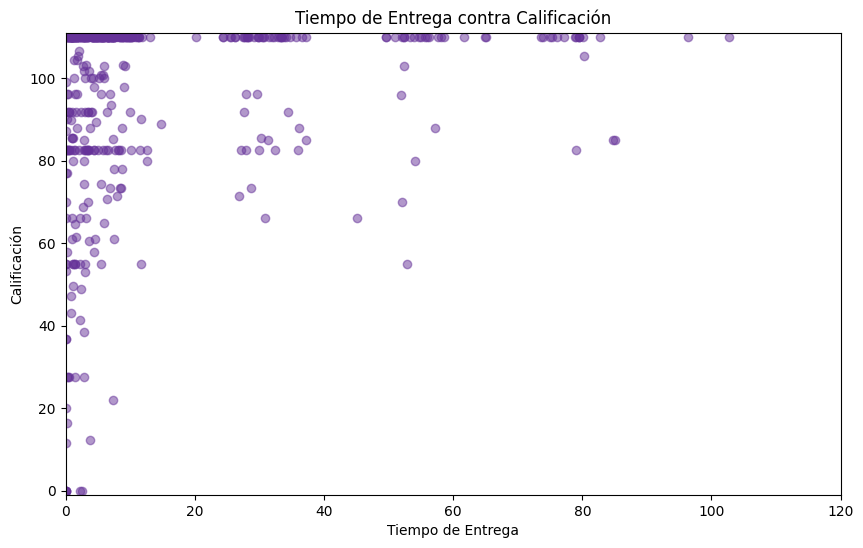

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Tiempo de Entrega.csv")
df.head()

# Encontrar valores átipicos
Q1 = df.Tiempo.quantile(0.25)
Q3 = df.Tiempo.quantile(0.75)
IQR = Q3 - Q1
limiteInferior = Q1 - (3 * IQR)
limiteSuperior = Q3 + (3 * IQR)
valores_extremos = df[(df.Tiempo <= limiteInferior) | (df.Tiempo >= limiteSuperior)]

#Eliminamos valores atípicos
mini = valores_extremos.Tiempo.min()
maxi = valores_extremos.Tiempo.max()
df_cleaned = df[~df.Tiempo.isin([mini, maxi])]
print(len(df_cleaned))
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Tiempo'], df_cleaned['Calificacion'], color='rebeccapurple',alpha=0.5)
plt.xlim(0, 120)
plt.ylim(df_cleaned['Calificacion'].min() - 1, df_cleaned['Calificacion'].max() + 1)
plt.title('Tiempo de Entrega contra Calificación')
plt.xlabel('Tiempo de Entrega')
plt.ylabel('Calificación')
plt.show()

**2.** Estaremos separando las observaciones en dos categorías: datos de prueba y de entrenamiento con una relación 70-30, así como calcularemos su promedio de cada uno de estos para ver si encontramos alguna similitud o diferencia.

In [44]:
# Importar librería
from sklearn.model_selection import train_test_split
# Separar datos en train y test, tanto para X como para Y
X_train, X_test, Y_train, Y_test = train_test_split(df.Tiempo,df.Calificacion,train_size = 0.7)
import numpy as np

#Corroboramos que el tamaño de las muestras sean las mismas para ambas variables entre sí
print("Las dimensiones de los datos son:", df.shape)
print("Tamaño de X_train:", len(X_train))
print("Tamaño de X_test:", len(X_test))
print("Tamaño de Y_train:", len(Y_train))
print("Tamaño de Y_test:", len(Y_test))

print("\n\nValores promedio tiempo de entrega" )
promentre_t = np.mean(X_train)
print("\nPromedio de tiempo de entrega en entrenamiento:", promentre_t)
promprueb_t = np.mean(X_test)
print("\nPromedio de tiempo de entrega en prueba:", promprueb_t)

print("\n\nValores promedio de las calificaciones" )
promentre_c = np.mean(Y_train)
print("\nPromedio de calificaciones en entrenamiento:", promentre_c)
promprueb_c = np.mean(Y_test)
print("\nPromedio de calificaciones en prueba:",promprueb_c)

Las dimensiones de los datos son: (427, 2)
Tamaño de X_train: 298
Tamaño de X_test: 129
Tamaño de Y_train: 298
Tamaño de Y_test: 129


Valores promedio tiempo de entrega

Promedio de tiempo de entrega en entrenamiento: 16.12729213255369

Promedio de tiempo de entrega en prueba: 20.941009905379847


Valores promedio de las calificaciones

Promedio de calificaciones en entrenamiento: 94.46490805369127

Promedio de calificaciones en prueba: 95.39585875968993


Como podemos ver contamos con 427 observaciones de las cuales tenemos dos variables, imprimimos los tamaños de ambos datos para corroborar que si se hayan separado con una relación 70-30. Al ver los resultados de los promedios de ambas variables vemos que no hay una diferencia grande entre los dos grupos (entrenamiento y prueba), por lo que podríamos esperar que nuestro modelo tenga mejores resultados para próximos conjuntos de datos.

**3.** Ahora entrenaremos a nuestro modelo ajustandolo a un polinomio grado 3 por medio de la función PolynomialFeatures de la librería sklearn.preprocessing la cual descargamos desde un inicio. Entrenar el modelo con este polinomio nos ayudará a ajustar nuestros datos a cierta función.

In [63]:
# Cambiar la forma de los datos
Xtemp_train = X_train.values.reshape(-1,1)
Xtemp_test = X_test.values.reshape(-1,1)

# Importar la librería
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm # Import statsmodels

# Generar polinomiales de grado 3 y ajustar los datos
polyq_train = PolynomialFeatures(degree=3).fit(Xtemp_train) # Use Xtemp_train
polyq_test = PolynomialFeatures(degree=3).fit(Xtemp_test) # Use Xtemp_test

# Transformar los datos para que incluyan el polinomial de tercer orden
Xq_train = pd.DataFrame(polyq_train.transform(Xtemp_train)) # Use Xtemp_train
Xq_test = pd.DataFrame(polyq_test.transform(Xtemp_test)) # Use Xtemp_test

# Generar y entrenar modelo
mt = sm.OLS(list(Y_train),Xq_train).fit()
# Imprimir resultados
print(mt.summary())

# Estimar el valor de Y en los datos de prueba
yHat_mt = mt.predict(Xq_test)
# Calcular RSS
RSS_mt = sum((list(Y_test)-yHat_mt)**2)
# Calcular RSE
RSE_mt = np.sqrt(RSS_mt/(len(Y_test)-1))
# Imprimir resultado en pantalla
print("\nEl Residual Standar Error es:",RSE_mt)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     10.43
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           1.53e-06
Time:                        08:26:06   Log-Likelihood:                -1357.6
No. Observations:                 298   AIC:                             2723.
Df Residuals:                     294   BIC:                             2738.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             90.6243      1.580     57.347      0.0

In [54]:
# Cambiar la forma de los datos
Xtemp_train = X_train.values.reshape(-1,1)
Xtemp_test = X_test.values.reshape(-1,1)

# Importar la librería
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm # Import statsmodels

# Generar polinomiales de grado 5 y ajustar los datos
polyq_train = PolynomialFeatures(degree=5).fit(Xtemp_train) # Use Xtemp_train
polyq_test = PolynomialFeatures(degree=5).fit(Xtemp_test) # Use Xtemp_test

# Transformar los datos para que incluyan el polinomial de tercer orden
Xq_train = pd.DataFrame(polyq_train.transform(Xtemp_train)) # Use Xtemp_train
Xq_test = pd.DataFrame(polyq_test.transform(Xtemp_test)) # Use Xtemp_test

# Generar y entrenar modelo
mq = sm.OLS(list(Y_train),Xq_train).fit()
# Imprimir resultados
print(mq.summary())

# Estimar el valor de Y en los datos de prueba
yHat_mq = mq.predict(Xq_test)
# Calcular RSS
RSS_mq = sum((list(Y_test)-yHat_mq)**2)
# Calcular RSE
RSE_mq = np.sqrt(RSS_mq/(len(Y_test)-1))
# Imprimir resultado en pantalla
print("\nEl Residual Standar Error es:",RSE_mq)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     6.532
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           8.88e-06
Time:                        08:07:37   Log-Likelihood:                -1356.8
No. Observations:                 298   AIC:                             2726.
Df Residuals:                     292   BIC:                             2748.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             89.7703      1.860     48.275      0.0

Al ver nuestros resultados podemos ver que nuestros datos se ajustan mejor a un polinomio grado 3 ya que comparando los RSE de ambos el de este grado resulta menor al de quinto grado; Por lo que estaremos usando el de tercer grado para ajustar nuestros datos, al igual que si escogemos el de quinto grado podríamos caer en un reajuste de datos y esto causaría que nuestro modelo no entregue tan buenos resultados con nuevos datos.


En este resumen de datos podemos observar una relación positiva entre los datos, ya que nuestro modelo asume que entre mayor sea el tiempo antes de la entrega, aumentará a su vez la calificación de esta tarea. Igualmente podemos concluir que nuestras variables son significativas entre sí ya que su p_value es menor a 0.05, sin embargo al revisar nuestro valor de R^2 nos damos cuenta que no son tan explicativas en nuestro modelo.

**4.** Entrenaremos un modelo generando una regresión segmentada, donde la función misma determinará la cantidad de segmentos y la posición de los knots

In [58]:
from mlinsights.mlmodel import PiecewiseRegressor
ms = PiecewiseRegressor('bins').fit(Xq_train.iloc[:,1:],Y_train)
yHat_ms = ms.predict(Xq_test.iloc[:,1:])
RSS_ms = sum((list(Y_test)-yHat_ms)**2)
RSE_ms = np.sqrt(RSS_ms/(len(Y_test)-1))
print("RSE del modelo piecewise: ",RSE_ms)

RSE del modelo piecewise:  22.82173222267179


Al implementar este modelo podemos ver que se disminuye el RSE por lo que este modelo resulta ser mejor para nuestros datos que el del polinomio de tercer orden

**5.** Ahora entrenaremos con un modelo KNN (modelo no paramétrico), el cual no ausme ninguna relación entre las variables de entrada y salida.

In [60]:
from sklearn.neighbors import KNeighborsRegressor as KNN
mk = KNN(n_neighbors=15).fit(Xtemp_train,Y_train)
yHat_mk = mk.predict(Xtemp_test)
RSS_mk = sum((list(Y_test)-yHat_mk)**2)
RSE_mk = np.sqrt(RSS_mk/(len(Y_test)-1))
print("RSE del modelo KNN: ",RSE_mk)

RSE del modelo KNN:  21.267998423580753


Observamos que este nos dio un RSE menor a los otros dos modelos, por lo que podemos decir que es el que mejor se ajusta a nuestros datos, siendo así si solo nos basaramos en este parámetro.

**6** Estaremos comparando el RSE de los tres modelos previamente generados, donde al ver sus resultados podríamos decir que el mejor sería el modelo KNN exclusivamente base este parámetro, sin embargo al considerar otros aspectos como la interpretabilidad el modelo KNN sería el peor y el polinomial sería el mejor puesto que tiene una ecuación que lo describe directamente.

In [66]:
print("RSE modelo polinomial (grado 3): ",RSE_mt)
print("RSE modelo piecewise: ",RSE_ms)
print("RSE modelo KNN: ",RSE_mk)


RSE modelo polinomial (grado 3):  22.954425568321515
RSE modelo piecewise:  22.82173222267179
RSE modelo KNN:  21.267998423580753


**7.** Ahora graficaremos los datos de calificación, de las reales y las predichas con cada modelo

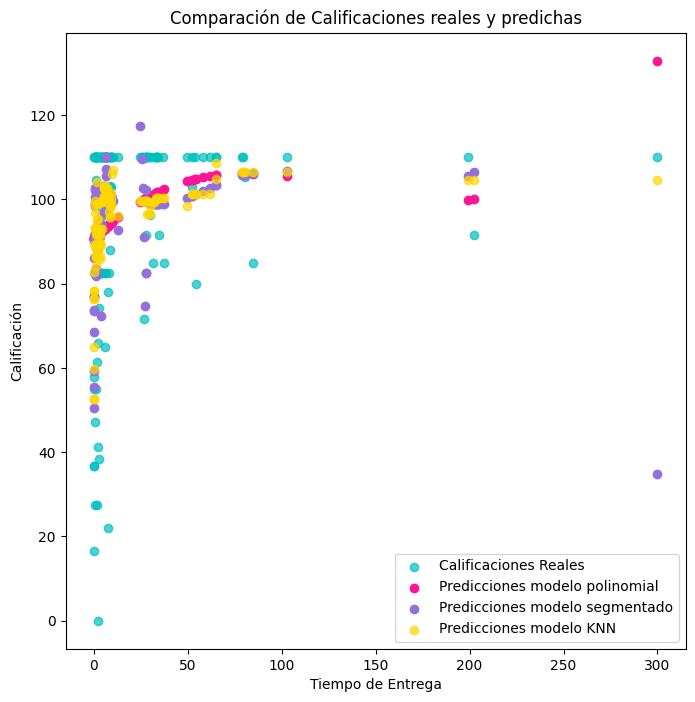

In [83]:
plt.figure(figsize=(8, 8))
# Calificaciones reales
plt.scatter(X_test, Y_test, color='c', label='Calificaciones Reales', alpha=0.7)
# Predicciones por regresión polinomial
plt.scatter(X_test, yHat_mt, color='deeppink', label='Predicciones modelo polinomial')
# Predicciones por regresión segmentada
plt.scatter(X_test, yhat_modeloPiecewise, color='mediumpurple', label='Predicciones modelo segmentado')
# Predicciones por KNN
plt.scatter(X_test, yHat_mk , color='gold', label='Predicciones modelo KNN', alpha=0.7)
plt.xlabel('Tiempo de Entrega')
plt.ylabel('Calificación')
plt.title('Comparación de Calificaciones reales y predichas')
plt.legend()
plt.show()
